In [4]:
import cv2
import os
import numpy as np
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from IPython.display import Image
from base64 import b64decode
import PIL.Image
from google.colab.output import eval_js
import io


In [5]:
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = '📸 Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);

      stream.getVideoTracks()[0].stop();
      div.remove();

      const dataUrl = canvas.toDataURL('image/jpeg', quality);
      return dataUrl;
    }
    ''')
    display(js)
    print("⌛ Waiting for you to capture...")
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename


In [6]:
import shutil

dataset_path = "face_dataset/me"
os.makedirs(dataset_path, exist_ok=True)

for i in range(10):  # capture 10 images
    filename = f"{dataset_path}/face_{i}.jpg"
    print(f"📷 Capturing image {i+1}")
    take_photo(filename)
    print(f"✅ Saved to {filename}\n")


📷 Capturing image 1


<IPython.core.display.Javascript object>

⌛ Waiting for you to capture...
✅ Saved to face_dataset/me/face_0.jpg

📷 Capturing image 2


<IPython.core.display.Javascript object>

⌛ Waiting for you to capture...
✅ Saved to face_dataset/me/face_1.jpg

📷 Capturing image 3


<IPython.core.display.Javascript object>

⌛ Waiting for you to capture...
✅ Saved to face_dataset/me/face_2.jpg

📷 Capturing image 4


<IPython.core.display.Javascript object>

⌛ Waiting for you to capture...
✅ Saved to face_dataset/me/face_3.jpg

📷 Capturing image 5


<IPython.core.display.Javascript object>

⌛ Waiting for you to capture...
✅ Saved to face_dataset/me/face_4.jpg

📷 Capturing image 6


<IPython.core.display.Javascript object>

⌛ Waiting for you to capture...
✅ Saved to face_dataset/me/face_5.jpg

📷 Capturing image 7


<IPython.core.display.Javascript object>

⌛ Waiting for you to capture...
✅ Saved to face_dataset/me/face_6.jpg

📷 Capturing image 8


<IPython.core.display.Javascript object>

⌛ Waiting for you to capture...
✅ Saved to face_dataset/me/face_7.jpg

📷 Capturing image 9


<IPython.core.display.Javascript object>

⌛ Waiting for you to capture...
✅ Saved to face_dataset/me/face_8.jpg

📷 Capturing image 10


<IPython.core.display.Javascript object>

⌛ Waiting for you to capture...
✅ Saved to face_dataset/me/face_9.jpg



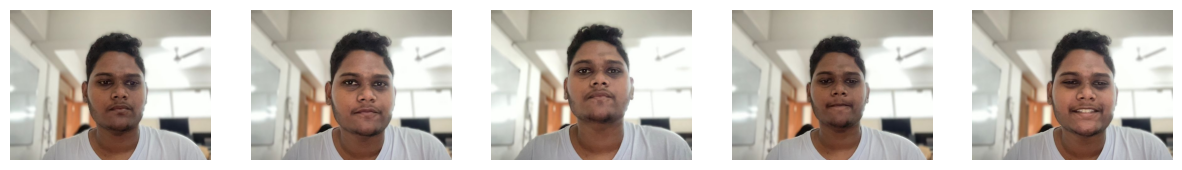

In [7]:
import matplotlib.pyplot as plt
import cv2

images = os.listdir(dataset_path)
fig, axs = plt.subplots(1, 5, figsize=(15, 5))

for i in range(5):  # show first 5 images
    img = cv2.imread(f"{dataset_path}/{images[i]}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axs[i].imshow(img)
    axs[i].axis('off')


In [8]:
from google.colab import files
files.upload()  # upload kaggle.json


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pavangavit55","key":"50e27c2b77c7aa7c2f077078adbbb92a"}'}

In [9]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [10]:
!kaggle datasets download -d jessicali9530/celeba-dataset
!unzip celeba-dataset.zip -d celeba_dataset


Streaming output truncated to the last 5000 lines.
  inflating: celeba_dataset/img_align_celeba/img_align_celeba/197604.jpg  
  inflating: celeba_dataset/img_align_celeba/img_align_celeba/197605.jpg  
  inflating: celeba_dataset/img_align_celeba/img_align_celeba/197606.jpg  
  inflating: celeba_dataset/img_align_celeba/img_align_celeba/197607.jpg  
  inflating: celeba_dataset/img_align_celeba/img_align_celeba/197608.jpg  
  inflating: celeba_dataset/img_align_celeba/img_align_celeba/197609.jpg  
  inflating: celeba_dataset/img_align_celeba/img_align_celeba/197610.jpg  
  inflating: celeba_dataset/img_align_celeba/img_align_celeba/197611.jpg  
  inflating: celeba_dataset/img_align_celeba/img_align_celeba/197612.jpg  
  inflating: celeba_dataset/img_align_celeba/img_align_celeba/197613.jpg  
  inflating: celeba_dataset/img_align_celeba/img_align_celeba/197614.jpg  
  inflating: celeba_dataset/img_align_celeba/img_align_celeba/197615.jpg  
  inflating: celeba_dataset/img_align_celeba/img_

In [11]:
import os

# Define the base directory where you extracted the archive
# Assuming you extracted it in the same directory as your Python script
base_extract_dir = "." # Or '/content/' if in Google Colab

# Construct the full path to the image directory
celeba_images_folder = os.path.join(base_extract_dir, "celeba_dataset", "img_align_celeba", "img_align_celeba")

print(f"CelebA images should be located at: {celeba_images_folder}")

# To list some images to verify:
if os.path.exists(celeba_images_folder):
    sample_files = os.listdir(celeba_images_folder)[:10] # List first 10 files
    print("\nFirst 10 files in the directory:")
    for f in sample_files:
        print(os.path.join(celeba_images_folder, f))
else:
    print(f"Error: The directory {celeba_images_folder} does not exist.")
    print("Please check where your CelebA dataset was actually extracted.")

CelebA images should be located at: ./celeba_dataset/img_align_celeba/img_align_celeba

First 10 files in the directory:
./celeba_dataset/img_align_celeba/img_align_celeba/029879.jpg
./celeba_dataset/img_align_celeba/img_align_celeba/199565.jpg
./celeba_dataset/img_align_celeba/img_align_celeba/070000.jpg
./celeba_dataset/img_align_celeba/img_align_celeba/011156.jpg
./celeba_dataset/img_align_celeba/img_align_celeba/187534.jpg
./celeba_dataset/img_align_celeba/img_align_celeba/046760.jpg
./celeba_dataset/img_align_celeba/img_align_celeba/125996.jpg
./celeba_dataset/img_align_celeba/img_align_celeba/099835.jpg
./celeba_dataset/img_align_celeba/img_align_celeba/134153.jpg
./celeba_dataset/img_align_celeba/img_align_celeba/043095.jpg


In [12]:
import os
import shutil
import random

# --- Configuration ---
# Define the source folder for the CelebA dataset images.
# Based on previous confirmation, this is the correct path.
celeba_source_folder = "./celeba_dataset/img_align_celeba/img_align_celeba"

# Define the destination folder where you want to store the 200 images.
# You can change 'extracted_celeba_200' to whatever you prefer.
destination_folder = "./extracted_celeba_200_images"

# Number of images to extract
num_images_to_extract = 200

# --- Script Start ---

print(f"Starting extraction of {num_images_to_extract} images from CelebA...")

# 1. Verify source folder exists
if not os.path.exists(celeba_source_folder):
    print(f"Error: CelebA source folder not found at '{celeba_source_folder}'.")
    print("Please ensure the CelebA dataset is correctly extracted and the path is correct.")
    # Exit or handle the error gracefully
    exit()

# 2. Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)
print(f"Destination folder '{destination_folder}' ensured.")

# 3. Get a list of all image files in the source directory
all_image_files = [f for f in os.listdir(celeba_source_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

if not all_image_files:
    print(f"Error: No image files found in '{celeba_source_folder}'. Is the folder empty?")
    exit()

print(f"Found {len(all_image_files)} total image files in the source.")

# 4. Select a random subset of images
if num_images_to_extract > len(all_image_files):
    print(f"Warning: Requested {num_images_to_extract} images, but only {len(all_image_files)} are available.")
    print("Extracting all available images.")
    selected_images = all_image_files
else:
    selected_images = random.sample(all_image_files, num_images_to_extract)

print(f"Selected {len(selected_images)} images for extraction.")

# 5. Copy the selected images to the destination folder
extracted_count = 0
for img_name in selected_images:
    src_path = os.path.join(celeba_source_folder, img_name)
    dst_path = os.path.join(destination_folder, img_name)

    try:
        shutil.copyfile(src_path, dst_path)
        extracted_count += 1
        # Optional: print progress
        if extracted_count % 50 == 0 or extracted_count == len(selected_images):
            print(f"Copied {extracted_count}/{len(selected_images)} images...")
    except FileNotFoundError:
        print(f"Warning: Source file not found for '{img_name}'. Skipping.")
    except Exception as e:
        print(f"An error occurred while copying '{img_name}': {e}")

print(f"\nSuccessfully extracted {extracted_count} images to '{destination_folder}'.")
print("Extraction complete.")

Starting extraction of 200 images from CelebA...
Destination folder './extracted_celeba_200_images' ensured.
Found 202599 total image files in the source.
Selected 200 images for extraction.
Copied 50/200 images...
Copied 100/200 images...
Copied 150/200 images...
Copied 200/200 images...

Successfully extracted 200 images to './extracted_celeba_200_images'.
Extraction complete.


In [13]:
# Install necessary libraries for face recognition and Colab utilities
!pip install face_recognition dlib
!pip install opencv-python # Usually pre-installed but good to be explicit

import cv2
import numpy as np
import os
import face_recognition # The main library for face recognition
from google.colab.patches import cv2_imshow # For displaying images in Colab
from google.colab.output import eval_js # For webcam capture
from IPython.display import display, Javascript, Image # For JS and displaying images
from PIL import Image as PILImage # To work with Pillow for image conversion
import io
import base64
import time # For delays and frame rate control

In [14]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.current_device())
print(torch.cuda.get_device_name(0))

True
0
Tesla T4


In [15]:
# --- Configuration for your dataset paths ---
MY_FACES_DIR = "face_dataset/me"
# OTHER_FACES_DIR = "./extracted_celeba_200_images" # You can use this for negative examples if needed,
                                                    # but for basic recognition, 'me' is enough.

known_face_encodings = []
known_face_names = []

print(f"Loading known faces from: {MY_FACES_DIR}")

# Ensure your 'me' directory exists
if not os.path.exists(MY_FACES_DIR):
    print(f"Error: Directory '{MY_FACES_DIR}' not found. Please create it and add your photos.")
    print("Example: Create 'face_dataset' folder, then 'me' inside it, and put your photos there.")
else:
    # Iterate through images in your 'me' folder
    for filename in os.listdir(MY_FACES_DIR):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(MY_FACES_DIR, filename)
            print(f"Processing: {image_path}")
            try:
                image = face_recognition.load_image_file(image_path)
                face_locations = face_recognition.face_locations(image)

                if face_locations:
                    # Take the first face found in the image
                    encoding = face_recognition.face_encodings(image, face_locations)[0]
                    known_face_encodings.append(encoding)
                    # Use the folder name as the person's name
                    known_face_names.append("Me") # Or extract name from filename if you have multiple people in 'me'

                else:
                    print(f"Warning: No face found in {filename}. Skipping.")
            except Exception as e:
                print(f"Error processing {filename}: {e}")

if not known_face_encodings:
    print("No known faces loaded. Face recognition will not work.")
else:
    print(f"Successfully loaded {len(known_face_encodings)} known face encodings.")
    print("Ready for real-time recognition!")

Loading known faces from: face_dataset/me
Processing: face_dataset/me/face_9.jpg
Error processing face_9.jpg: Error while calling cudaOccupancyMaxPotentialBlockSize(&num_blocks,&num_threads,K) in file /tmp/.tmpLNTiSQ/sdists-v9/pypi/dlib/19.24.6/X60rDgV-JVh5fubriMmN9/src/dlib/cuda/cuda_utils.h:186. code: 222, reason: the provided PTX was compiled with an unsupported toolchain.
Processing: face_dataset/me/face_2.jpg
Error processing face_2.jpg: Error while calling cudaOccupancyMaxPotentialBlockSize(&num_blocks,&num_threads,K) in file /tmp/.tmpLNTiSQ/sdists-v9/pypi/dlib/19.24.6/X60rDgV-JVh5fubriMmN9/src/dlib/cuda/cuda_utils.h:186. code: 222, reason: the provided PTX was compiled with an unsupported toolchain.
Processing: face_dataset/me/face_6.jpg
Error processing face_6.jpg: Error while calling cudaOccupancyMaxPotentialBlockSize(&num_blocks,&num_threads,K) in file /tmp/.tmpLNTiSQ/sdists-v9/pypi/dlib/19.24.6/X60rDgV-JVh5fubriMmN9/src/dlib/cuda/cuda_utils.h:186. code: 222, reason: the prov